# Customize the appearance of the plot


-  use ``m.set_plot_specs()`` to set the general appearance of the plot
-  after creating the plot, you can access individual objects via ``m.figure.<...>`` … most importantly:

   -  ``f`` : the matplotlib figure
   -  ``ax``, ``ax_cb``, ``ax_cb_plot`` : the axes used for plotting the map, colorbar and histogram
   -  ``gridspec``, ``cb_gridspec`` : the matplotlib GridSpec instances for the plot and the colorbar
   -  ``coll`` : the collection representing the data on the map

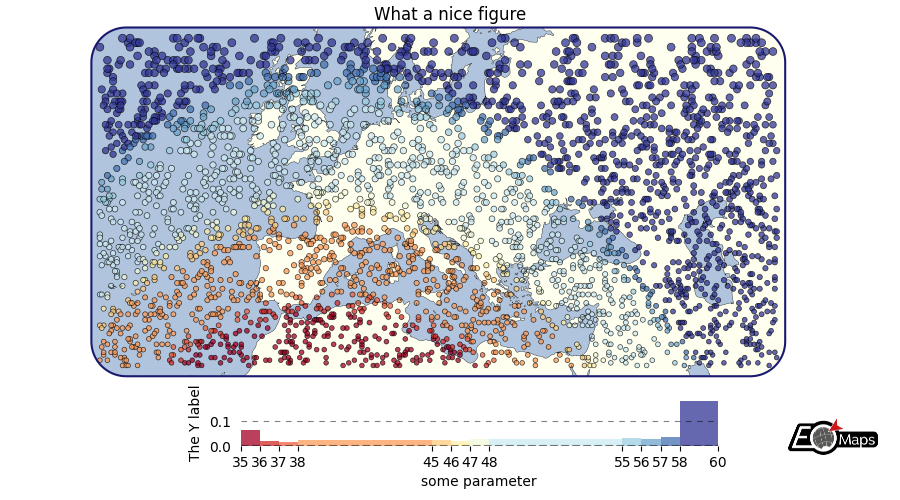

In [2]:
# EOmaps example: Customize the appearance of the plot

from eomaps import Maps
import pandas as pd
import numpy as np

# ----------- create some example-data
lon, lat = np.meshgrid(np.arange(-30, 60, 0.25), np.arange(30, 60, 0.3))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat)
)
data = data.sample(3000)  # take 3000 random datapoints from the dataset
# ------------------------------------

m = Maps(crs=3857, figsize=(9, 5))
m.set_frame(rounded=0.2, lw=1.5, ec="midnightblue", fc="ivory")
m.text(0.5, 0.97, "What a nice figure", fontsize=12)

m.add_feature.preset.ocean(fc="lightsteelblue")
m.add_feature.preset.coastline(lw=0.25)

m.set_data(data=data, x="lon", y="lat", crs=4326)
m.set_shape.geod_circles(radius=30000)  # plot geodesic-circles with 30 km radius
m.set_classify_specs(
    scheme="UserDefined", bins=[35, 36, 37, 38, 45, 46, 47, 48, 55, 56, 57, 58]
)
m.plot_map(
    edgecolor="k",  # give shapes a black edgecolor
    linewidth=0.5,  # with a linewidth of 0.5
    cmap="RdYlBu",  # use a red-yellow-blue colormap
    vmin=35,  # map colors to values between 35 and 60
    vmax=60,
    alpha=0.75,  # add some transparency
)

# add a colorbar
m.add_colorbar(
    label="some parameter",
    hist_bins="bins",
    hist_size=1,
    hist_kwargs=dict(density=True),
)

# add a y-label to the histogram
m.colorbar.ax_cb_plot.set_ylabel("The Y label")

# add a logo to the plot
m.add_logo()

m.apply_layout(
    {
        "figsize": [9.0, 5.0],
        "0_map": [0.10154, 0.2475, 0.79692, 0.6975],
        "1_cb": [0.20125, 0.0675, 0.6625, 0.135],
        "1_cb_histogram_size": 1,
        "2_logo": [0.87501, 0.09, 0.09999, 0.07425],
    }
)
m.show()